# unsafe.Pointer usage survey



In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import json
from datetime import datetime

In [18]:
MATCH_TYPES = (
    'unsafe.Pointer', 'unsafe.Sizeof', 'unsafe.Alignof', 'unsafe.Offsetof',
    'uintptr', 'reflect.SliceHeader', 'reflect.StringHeader'
)

## Analyse von Projektdaten

In [19]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S %z %Z')

projects_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/data/projects.csv',
                         parse_dates=['project_created_at', 'project_last_pushed_at', 'project_updated_at'],
                         date_parser=dateparse)

In [20]:
projects_df[:5]

,project_rank,project_name,project_github_clone_url,project_number_of_stars,project_number_of_forks,project_github_id,project_created_at,project_last_pushed_at,project_updated_at,project_size,project_checkout_path
0,1,golang/go,https://github.com/golang/go.git,71169,10164,23096959,2014-08-19 04:33:40+00:00,2020-04-13 10:27:46+00:00,2020-04-13 11:58:18+00:00,209324,/home/johannes/studium/s14/masterarbeit/downlo...
1,2,kubernetes/kubernetes,https://github.com/kubernetes/kubernetes.git,64968,23144,20580498,2014-06-06 22:56:04+00:00,2020-04-13 11:53:02+00:00,2020-04-13 11:17:13+00:00,909251,/home/johannes/studium/s14/masterarbeit/downlo...
2,3,moby/moby,https://github.com/moby/moby.git,56804,16416,7691631,2013-01-18 18:10:57+00:00,2020-04-12 15:23:23+00:00,2020-04-13 12:00:24+00:00,152827,/home/johannes/studium/s14/masterarbeit/downlo...
3,4,avelino/awesome-go,https://github.com/avelino/awesome-go.git,53411,7088,21540759,2014-07-06 13:42:15+00:00,2020-04-13 09:42:24+00:00,2020-04-13 11:56:14+00:00,8027,/home/johannes/studium/s14/masterarbeit/downlo...
4,5,gohugoio/hugo,https://github.com/gohugoio/hugo.git,43140,4900,11180687,2013-07-04 15:26:26+00:00,2020-04-12 19:12:47+00:00,2020-04-13 11:52:14+00:00,86013,/home/johannes/studium/s14/masterarbeit/downlo...


## Analyse von Match Daten

In [21]:
matches_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/data/unsafe_matches.csv')

In [22]:
matches_df

,module_import_path,module_registry,module_version,module_number_go_files,file_name,file_size_bytes,file_size_lines,file_imports_unsage_pkg,file_go_vet_output,text,context,line_number,byte_offset,match_type
0,github.com/Azure/go-ansiterm,github.com,NaN,22,winterm/api.go,12469,327,True,vet: ./api.go:32:24: NewLazyDLL not declared b...,"\tr1, r2, err := getConsoleCursorInfoProc.Call...",}\n\n// GetConsoleCursorInfo retrieves informa...,178,6018,unsafe.Pointer
1,github.com/Azure/go-ansiterm,github.com,NaN,22,winterm/api.go,12469,327,True,vet: ./api.go:32:24: NewLazyDLL not declared b...,"\tr1, r2, err := setConsoleCursorInfoProc.Call...",}\n\n// SetConsoleCursorInfo sets the size and...,185,6393,unsafe.Pointer
2,github.com/Azure/go-ansiterm,github.com,NaN,22,winterm/api.go,12469,327,True,vet: ./api.go:32:24: NewLazyDLL not declared b...,\terr := checkError(getConsoleScreenBufferInfo...,\n// GetConsoleScreenBufferInfo retrieves info...,216,7792,unsafe.Pointer
3,github.com/Azure/go-ansiterm,github.com,NaN,22,winterm/api.go,12469,327,True,vet: ./api.go:32:24: NewLazyDLL not declared b...,"\tr1, r2, err := scrollConsoleScreenBufferProc...","\t}\n\treturn &info, nil\n}\n\nfunc ScrollCons...",224,8084,unsafe.Pointer
4,github.com/Azure/go-ansiterm,github.com,NaN,22,winterm/api.go,12469,327,True,vet: ./api.go:32:24: NewLazyDLL not declared b...,"\tr1, r2, err := setConsoleWindowInfoProc.Call...",\n// SetConsoleWindowInfo sets the size and po...,253,9532,unsafe.Pointer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,github.com/Azure/go-ansiterm/winterm,github.com,NaN,8,api.go,12469,327,True,vet: ./api.go:32:24: NewLazyDLL not declared b...,\treturn uintptr(*((*uint32)(unsafe.Pointer(&c...,}\n\n// coordToPointer converts a COORD into a...,322,12266,uintptr
74,github.com/Azure/go-ansiterm/winterm,github.com,NaN,8,ansi.go,4817,182,False,vet: ./ansi.go:166:15: STD_INPUT_HANDLE not de...,"func GetStdFile(nFile int) (*os.File, uintptr)...",\t} else {\n\t\treturn n\n\t}\n}\n\nfunc GetSt...,163,4328,uintptr
75,github.com/Azure/go-ansiterm/winterm,github.com,NaN,8,ansi.go,4817,182,False,vet: ./ansi.go:166:15: STD_INPUT_HANDLE not de...,"\treturn file, uintptr(fd)\n","\tfd, err := syscall.GetStdHandle(nFile)\n\tif...",181,4789,uintptr
76,github.com/Azure/go-ansiterm/winterm,github.com,NaN,8,win_event_handler.go,17298,743,False,vet: ./win_event_handler.go:17:18: undeclared ...,\tfd uintptr\n,"\n\t""github.com/Azure/go-ansiterm""\n)\n\ntype ...",15,152,uintptr


In [23]:
# 10 examples of a unsafe.Pointer match

print("\n\n".join([s.strip() for s in list(matches_df['text'][:10])]))

r1, r2, err := getConsoleCursorInfoProc.Call(handle, uintptr(unsafe.Pointer(cursorInfo)), 0)

r1, r2, err := setConsoleCursorInfoProc.Call(handle, uintptr(unsafe.Pointer(cursorInfo)), 0)

err := checkError(getConsoleScreenBufferInfoProc.Call(handle, uintptr(unsafe.Pointer(&info)), 0))

r1, r2, err := scrollConsoleScreenBufferProc.Call(handle, uintptr(unsafe.Pointer(&scrollRect)), uintptr(unsafe.Pointer(&clipRect)), coordToPointer(destOrigin), uintptr(unsafe.Pointer(&char)))

r1, r2, err := setConsoleWindowInfoProc.Call(handle, uintptr(boolToBOOL(isAbsolute)), uintptr(unsafe.Pointer(&rect)))

r1, r2, err := writeConsoleOutputProc.Call(handle, uintptr(unsafe.Pointer(&buffer[0])), coordToPointer(bufferSize), coordToPointer(bufferCoord), uintptr(unsafe.Pointer(writeRegion)))

r1, r2, err := readConsoleInputProc.Call(handle, uintptr(unsafe.Pointer(&buffer[0])), uintptr(len(buffer)), uintptr(unsafe.Pointer(count)))

return uintptr(*((*uint32)(unsafe.Pointer(&c))))

func GetConsoleCursorInfo(

In [24]:
# 1 example of a match context

print(matches_df['context'][0])

}

// GetConsoleCursorInfo retrieves information about the size and visiblity of the console cursor.
// See https://msdn.microsoft.com/en-us/library/windows/desktop/ms683163(v=vs.85).aspx.
func GetConsoleCursorInfo(handle uintptr, cursorInfo *CONSOLE_CURSOR_INFO) error {
	r1, r2, err := getConsoleCursorInfoProc.Call(handle, uintptr(unsafe.Pointer(cursorInfo)), 0)
	return checkError(r1, r2, err)
}

// SetConsoleCursorInfo sets the size and visiblity of the console cursor.
// See https://msdn.microsoft.com/en-us/library/windows/desktop/ms686019(v=vs.85).aspx.



In [25]:
# Number of matches per module

matches_df[matches_df['match_type']=='unsafe.Pointer']\
    .groupby(['module_import_path'])['module_import_path']\
    .count()

module_import_path
github.com/Azure/go-ansiterm            8
github.com/Azure/go-ansiterm/winterm    8
Name: module_import_path, dtype: int64

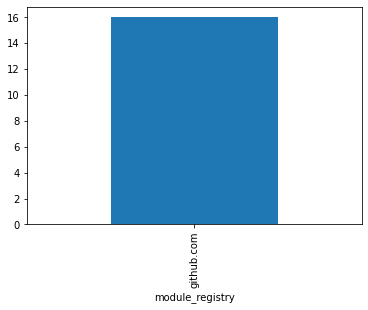

In [26]:
# Number of matches per registry

matches_df[matches_df['match_type']=='unsafe.Pointer']\
    .groupby(['module_registry'])['module_registry']\
    .count().plot(kind='bar')

# Analyse von Moduldaten

In [28]:
modules_df = pd.read_csv('/home/johannes/studium/s14/masterarbeit/code/data-survey/data/modules.csv')

In [29]:
modules_df

,project_name,module_import_path,module_registry,module_version,module_number_go_files
0,kubernetes/kubernetes,bitbucket.org/bertimus9/systemstat,bitbucket.org,NaN,4
1,kubernetes/kubernetes,cloud.google.com/go/compute/metadata,cloud.google.com,NaN,1
2,kubernetes/kubernetes,github.com/armon/circbuf,github.com,NaN,1
3,kubernetes/kubernetes,github.com/asaskevich/govalidator,github.com,NaN,8
4,kubernetes/kubernetes,github.com/aws/aws-sdk-go/aws,github.com,NaN,86
...,...,...,...,...,...
91,kubernetes/kubernetes,github.com/chai2010/gettext-go/gettext,github.com,NaN,25
92,kubernetes/kubernetes,github.com/chai2010/gettext-go/gettext/mo,github.com,NaN,6
93,kubernetes/kubernetes,github.com/chai2010/gettext-go/gettext/plural,github.com,NaN,3
94,kubernetes/kubernetes,github.com/chai2010/gettext-go/gettext/po,github.com,NaN,8


In [30]:
# number of modules per registry

modules_df.groupby('module_registry')['module_import_path'].nunique()

module_registry
bitbucket.org        1
cloud.google.com     1
github.com          94
Name: module_import_path, dtype: int64